<a href="https://colab.research.google.com/github/zidanardany/hasil-belajar-ai-mastery/blob/main/Implementation_of_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task**
1. Autoencoders for image compression
2. Autoencoders for image denosing

**Architeture**
1. Encoder
2. Code -> latent sparse representatoin
3. Decoder

## Autoencoders for Image Compression - Fully Connected Autoencoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers

**Data Preparation**

In [ ]:
(xtrain,ytain), (xtest, ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
ytest[0]

7

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
xtrain = xtrain/255
xtest = xtest/255

**Convert m x n dimension to m-dimension**

In [ ]:
xtrain = xtrain.reshape(60000, 28*28)
xtest = xtest.reshape(10000, 28*28)

**Modelling**

In [ ]:
#Encoder
input_layer = layers.Input(shape=(784,))
dense1 = layers.Dense(128, activation='relu')(input_layer)

# Code - Latent sparse representation
dense2 = layers.Dense(16, activation='relu')(dense1)

#Decoder
dense3 = layers.Dense(128, activation='relu')(dense2)
output_layer = layers.Dense(784, activation='sigmoid')(dense3)

model = models.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dense_2 (Dense)             (None, 128)               2176      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 205,856
Trainable params: 205,856
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit(xtrain, xtrain, epochs=30, batch_size=128, shuffle=True)

Epoch 1/30
469/469 [==============================] - 6s 10ms/step - loss: 0.2025
Epoch 2/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1357
Epoch 3/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1274
Epoch 4/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1229
Epoch 5/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1201
Epoch 6/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1182
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1167
Epoch 8/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1153
Epoch 9/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1142
Epoch 10/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1132
Epoch 11/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1124
Epoch 12/30
469/469 [==============================] - 5s 10ms/step - loss: 0.1116
Epoch 13/30
4

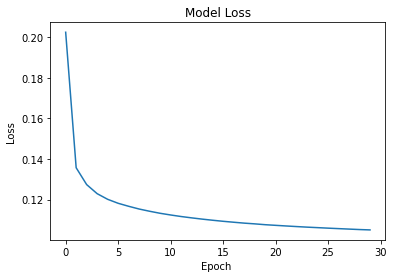

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss ')
plt.xlabel('Epoch ')
plt.show()

In [ ]:
laten_sparse = models.Model(input_layer, dense2)
laten_sparse.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
Total params: 102,544
Trainable params: 102,544
Non-trainable params: 0
_________________________________________________________________


**Prediction**

In [ ]:
laten_sparse_pred = laten_sparse.predict(xtest)
output_pred = model.predict(xtest)

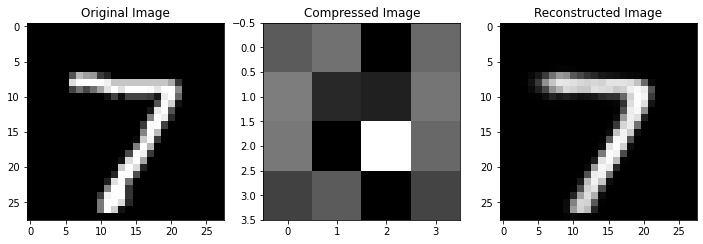

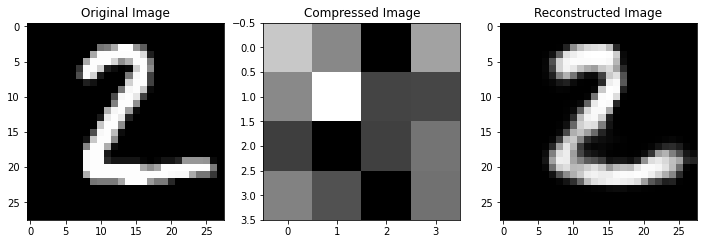

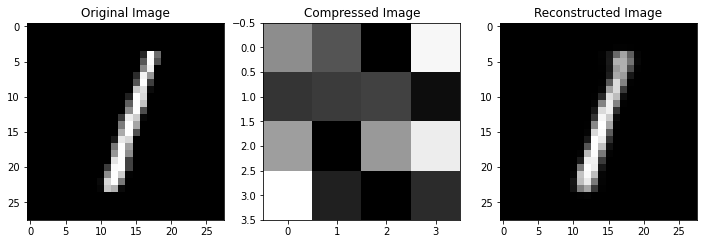

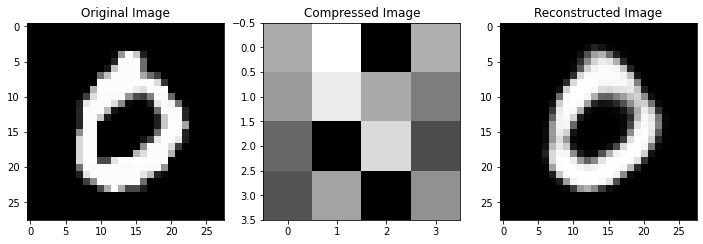

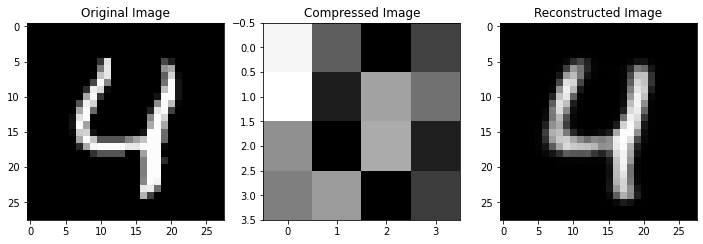

In [ ]:
n = 5
for i in range(n):
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  plt.title('Original Image')
  plt.imshow(xtest[i].reshape(28,28), cmap='gray')
  

  plt.subplot(132)
  plt.title('Compressed Image')
  plt.imshow(laten_sparse_pred[i].reshape(4,4), cmap='gray')

  plt.subplot(133)
  plt.title('Reconstructed Image')
  plt.imshow(output_pred[i].reshape(28,28), cmap='gray')
  plt.show()

## Autoencoders for denoising images - Convolutional Autoencoder

In [ ]:
(xtrain,ytain), (xtest, ytest) = mnist.load_data()

In [ ]:
#Scaling the images
xtrain = (xtrain - 127.5) / 127.5
xtest = (xtest - 127.5) / 127.5

In [ ]:
#Reshaping
xtrain = xtrain.reshape(60000, 28,28, 1)
xtest = xtest.reshape(10000, 28,28, 1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Modeling**

In [ ]:
#Encoder
input_layer = layers.Input(shape=(28,28,1))
conv1 = layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=(2,2))(input_layer)

#Code - Latent spare representation
conv2 = layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=(2,2))(conv1)

#Decoder
conv3 = layers.Conv2DTranspose(8, (3,3), activation='relu', padding='same', strides=(2,2))(conv2)
conv4 = layers.Conv2DTranspose(16, (3,3), activation='relu', padding='same', strides=(2,2))(conv3)

output_layer = layers.Conv2D(1, (3,3), activation='tanh', padding='same')(conv4)

model = models.Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145 

In [ ]:
from tensorflow.keras import losses
model.compile(optimizer='adam', loss=losses.MeanSquaredError())

**membuat sintesa dataset (noise) dari original image**

In [ ]:
import tensorflow as tf

noise_factor = 0.4
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape=xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape=xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy, -1, 1.0)
xtest_noisy = tf.clip_by_value(xtest_noisy, -1, 1.0)

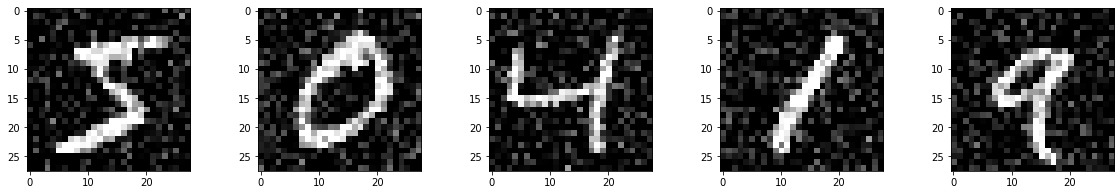

In [ ]:
n = 5
plt.figure(figsize=(20,3))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(tf.squeeze(xtrain_noisy[i]), cmap='gray')
plt.show()

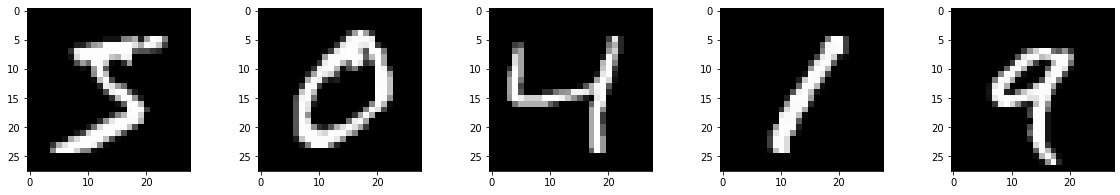

In [ ]:
n = 5
plt.figure(figsize=(20,3))
for i in range(n):
  plt.subplot(1, n, i+1)
  plt.imshow(tf.squeeze(xtrain[i]), cmap='gray')
plt.show()

In [ ]:
history = model.fit(xtrain_noisy, xtrain, epochs=5, batch_size=2000, shuffle=True)

Epoch 1/5
30/30 [==============================] - 54s 2s/step - loss: 0.6934
Epoch 2/5
30/30 [==============================] - 47s 2s/step - loss: 0.3157
Epoch 3/5
30/30 [==============================] - 49s 2s/step - loss: 0.2331
Epoch 4/5
30/30 [==============================] - 47s 2s/step - loss: 0.1756
Epoch 5/5
30/30 [==============================] - 51s 2s/step - loss: 0.1476


In [ ]:
laten_sparse = models.Model(input_layer, conv2)
laten_sparse.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
laten_sparse_pred = laten_sparse.predict(xtest_noisy)
output_pred = model.predict(xtest_noisy)

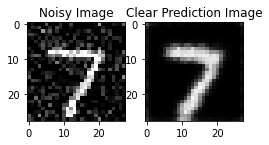

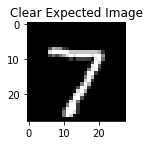

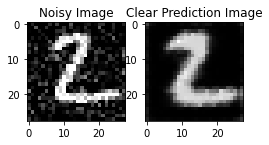

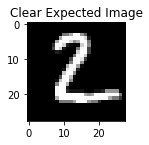

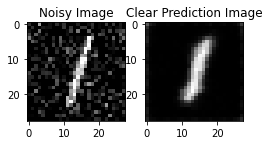

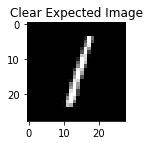

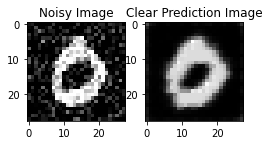

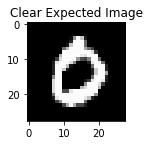

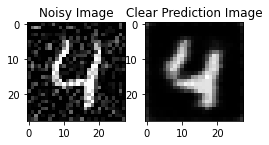

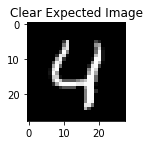

In [ ]:
n = 5
for i in range(n):
  plt.subplot(131)
  plt.title('Noisy Image')
  plt.imshow(tf.squeeze(xtest_noisy[i]), cmap='gray')
  
  plt.subplot(132)
  plt.title('Clear Prediction Image')
  plt.imshow(output_pred[i].reshape(28,28), cmap='gray')
  plt.show()

  plt.subplot(133)
  plt.title('Clear Expected Image')
  plt.imshow(tf.squeeze(xtest[i]), cmap='gray')
  plt.show()